implementation of Load Forecasting(Hourly) using  **Exponential Smoothing**  on **Hourly Data**

In [38]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [39]:
from google.colab import files
uploaded = files.upload()

Saving H_load.csv to H_load (1).csv


In [40]:
import io
df = pd.read_csv(io.BytesIO(uploaded['H_load.csv']))[:750]

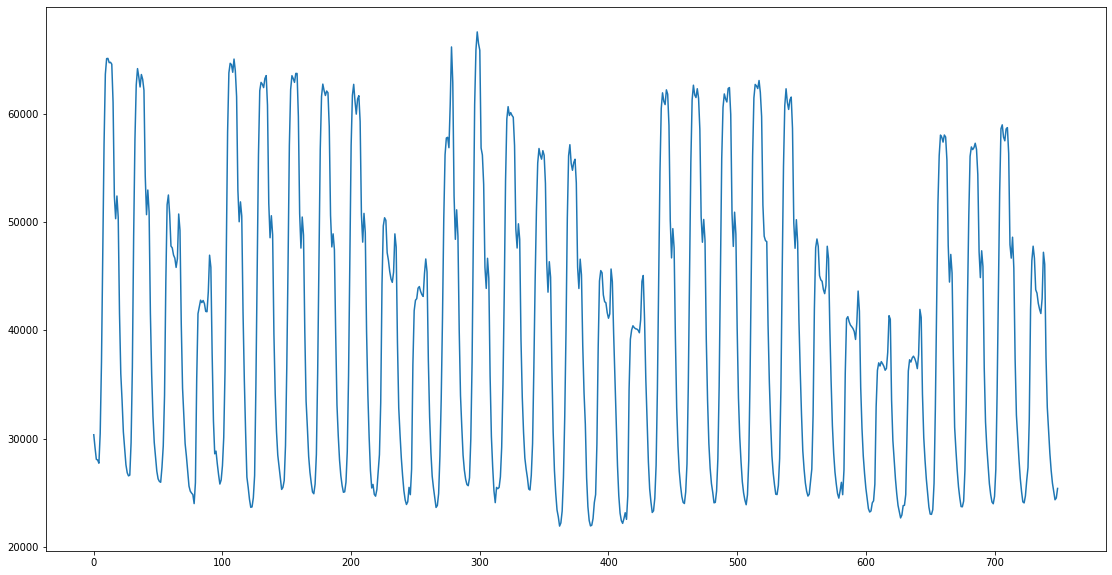

In [41]:
plt.figure(figsize=(19,10))
plt.plot(df)
plt.show()

In [48]:


def exp_smth (l,a,n):
    
    if n==0:
        return l[0]
    if n==1:
        return a*(l[0])
    
   # Y=aXt+(1-a)Yt-1, 0<a<1
    return a*l[n-1]+(1-a)*exp_smth(l,a,n-1)



# main function 
    
l=list(df['Load'])
l1=[]
for i in range(len(l)):
    l1.append(round(exp_smth(l,0.7,i)))


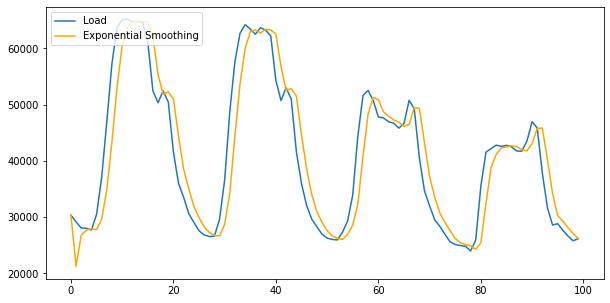

In [49]:
plt.figure(figsize=(10,5))
plt.plot(df[:100], label='Load')
plt.plot(l1[:100], label='Exponential Smoothing', color='orange')
plt.legend(loc='upper left')
plt.show()

In [50]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [51]:
mape=mean_absolute_percentage_error(l, l1)
print("Mean Absolute Percentage Error using Exponential Smoothing Method is",round(mape,2),"%")

Mean Absolute Percentage Error using Exponential Smoothing Method is 9.91 %
